## Credit Card Atrrition


Credit card attrition a major problem that banks or credit card companies are afraid of. Consider that you have been recently hired by a consumer credit card bank as a data scientist where business manager of the bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off. This helps them in better planning and to retain the customers before they churn.


Data Definition:

**CLIENTNUM**: Client number. Unique identifier for the customer holding the account

**Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then Attrited customer else Existing customer

**Customer_Age**: Demographic variable - Customer's Age in Years

**Gender**: Demographic variable - M=Male, F=Female

**Dependent_count**: Demographic variable - Number of dependents

**Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown

**Income_Category**: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 

**Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book**: Period of relationship with bank

**Total_Relationship_Count**: Total no. of products held by the customer

**Months_Inactive_12_mon**: No. of months inactive in the last 12 months

**Contacts_Count_12_monNo.**: of Contacts in the last 12 months

**Credit_Limit**: Credit Limit on the Credit Card

**Total_Revolving_Bal**: Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)

**Total_Trans_Amt**: Total Transaction Amount (Last 12 months)

**Total_Trans_Ct**: Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio**: Average Card Utilization Ratio

In [63]:
#Data import and manipulation
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
from matplotlib import pyplot as plt

# For over sampling and under sampling of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For split of the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Importing models to work with
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# To evaludate the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Perform Data Health Checks

In [3]:
df.shape

(10127, 23)

In [4]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [5]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.isnull().sum() / df.shape[1]

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Observations: 

In [10]:
categorical_cols = df.select_dtypes(['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(['int64', 'float']).columns.tolist()

# Remove the id variable from numerical cols
numerical_cols.remove('CLIENTNUM')

# Drop the target column from categorical cols
categorical_cols.remove('Attrition_Flag')

## Univariate Analysis

In [11]:
def distribution_plot(data, feature, figsize=(8, 5), bins=10, kde=False):
    f2, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
def univariate_categorical_analysis(df, column):

    print("Percentage distribution for", column)
    print(df[column].value_counts(normalize=True) * 100)
    print()
    
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Bar Plot: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

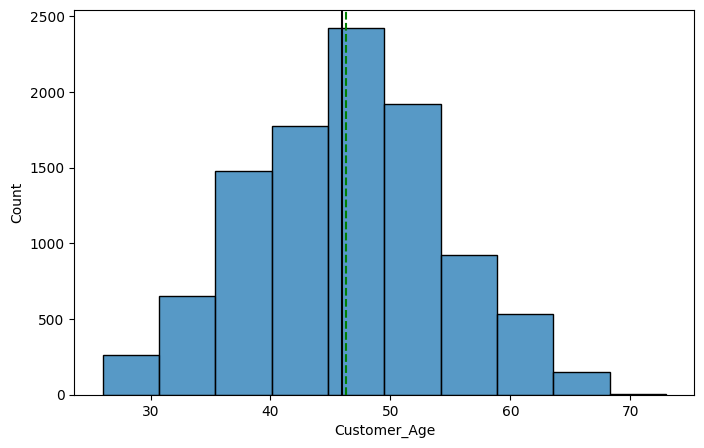

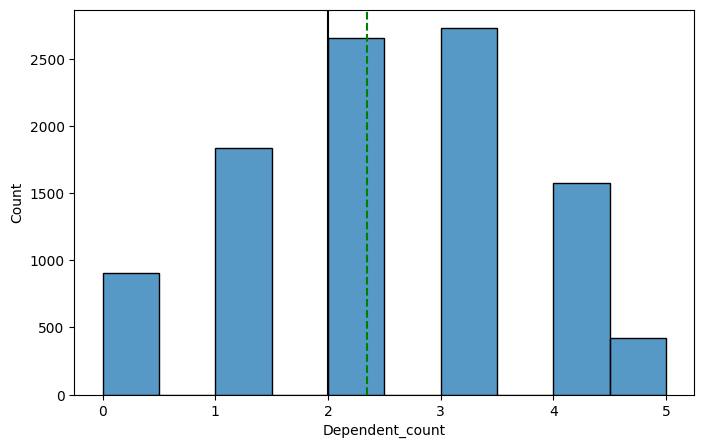

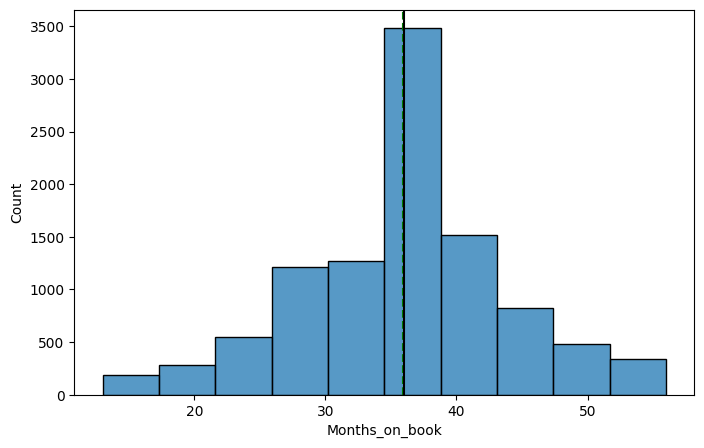

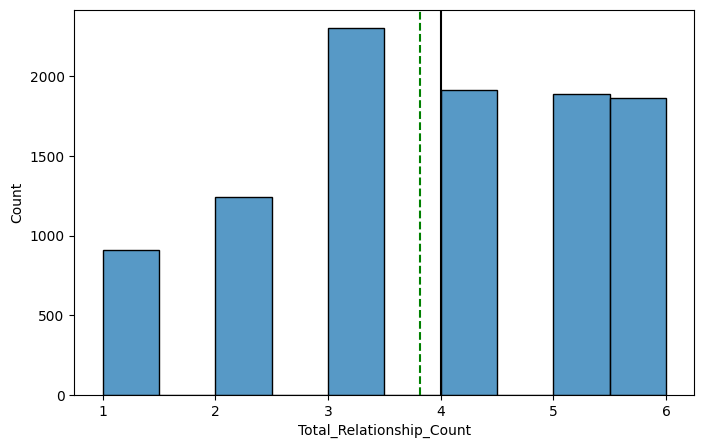

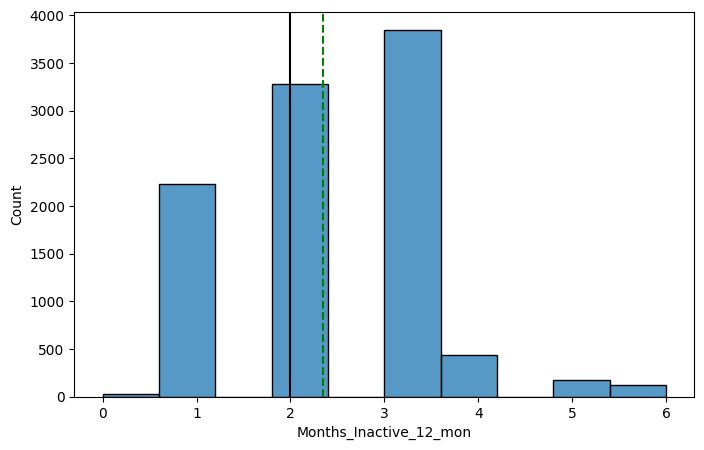

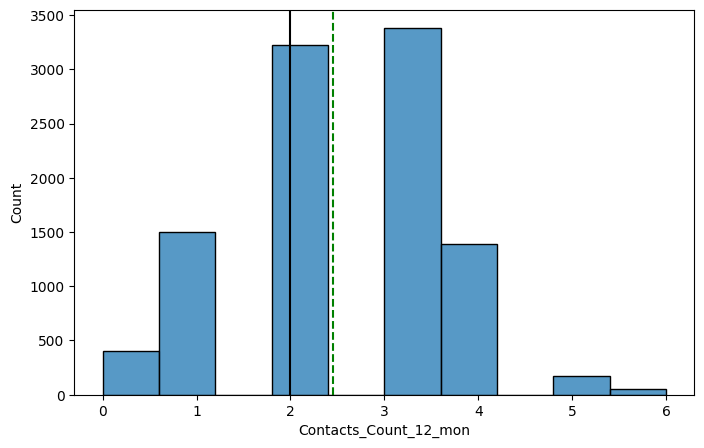

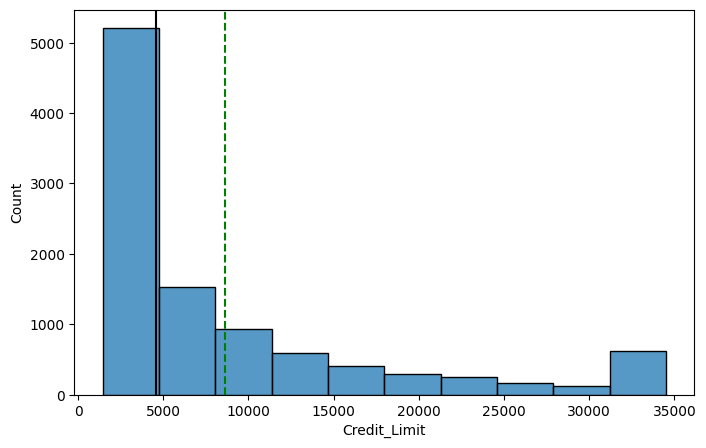

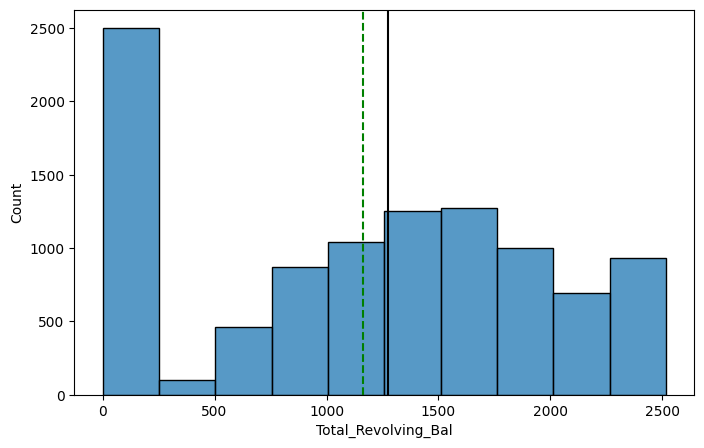

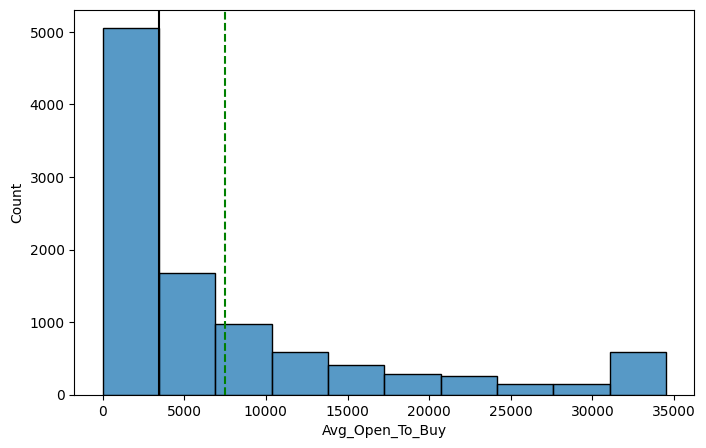

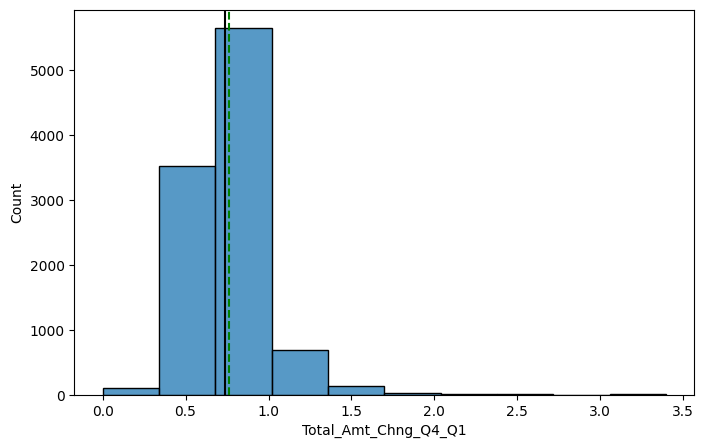

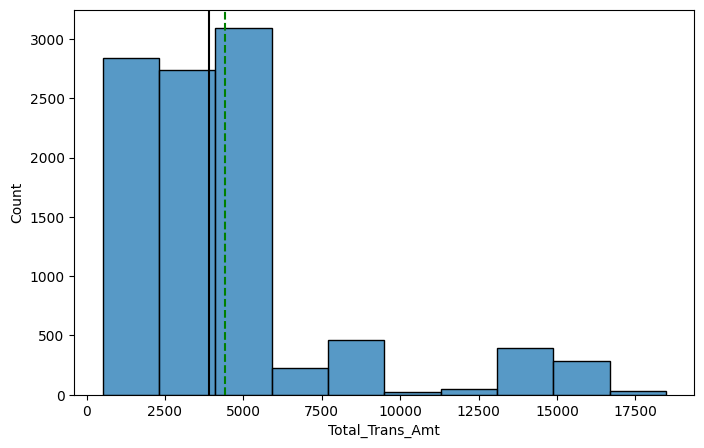

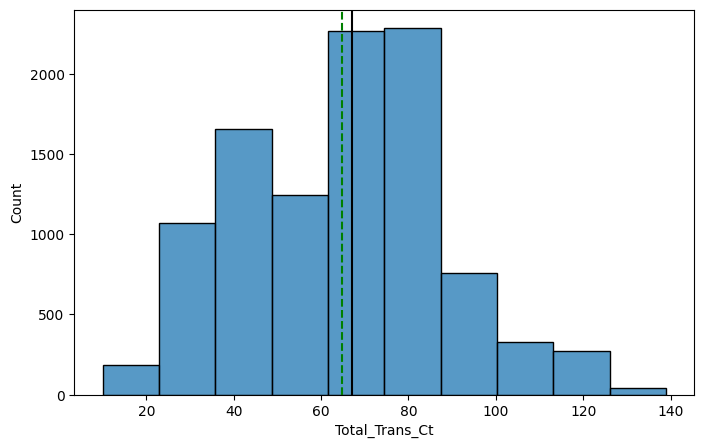

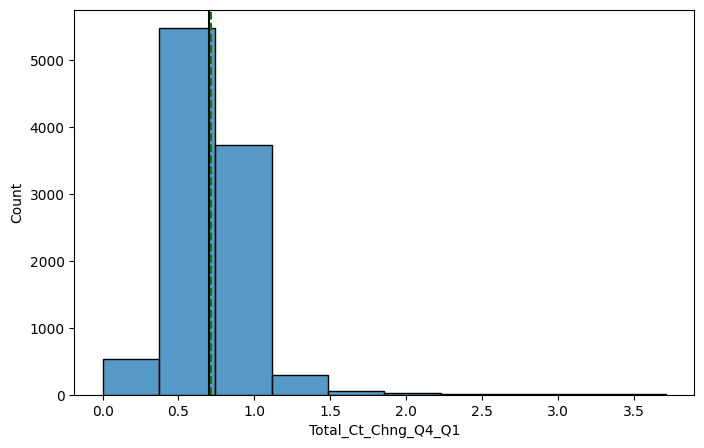

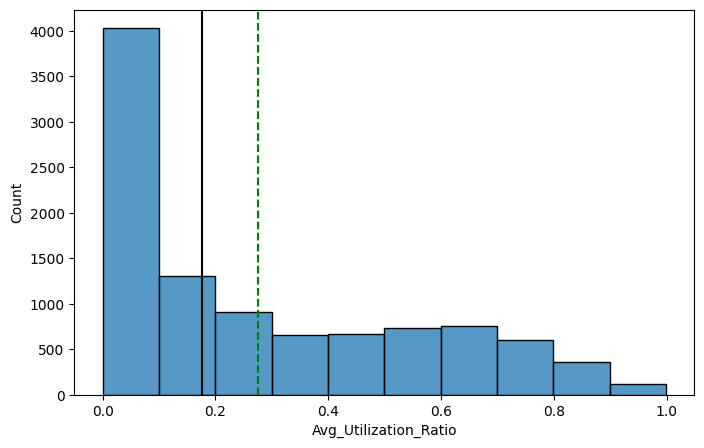

In [13]:
for col in numerical_cols:
    distribution_plot(df, col)

Percentage distribution for Gender
F    52.908068
M    47.091932
Name: Gender, dtype: float64



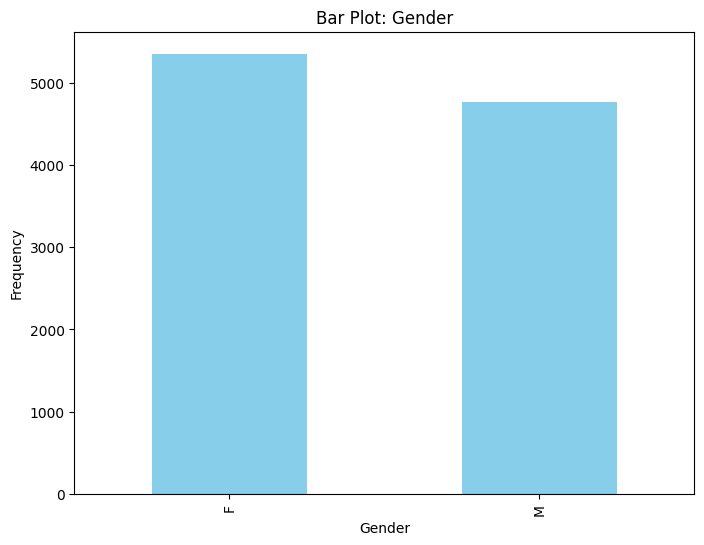

Percentage distribution for Education_Level
Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64



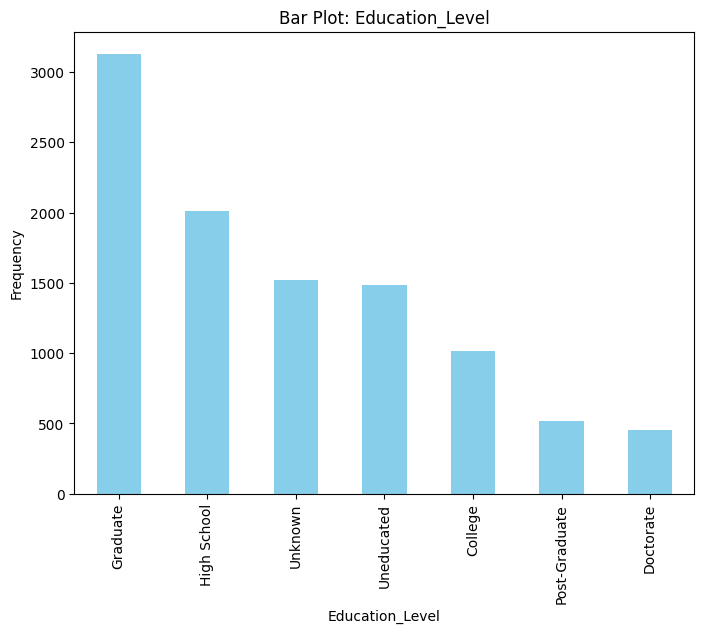

Percentage distribution for Marital_Status
Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64



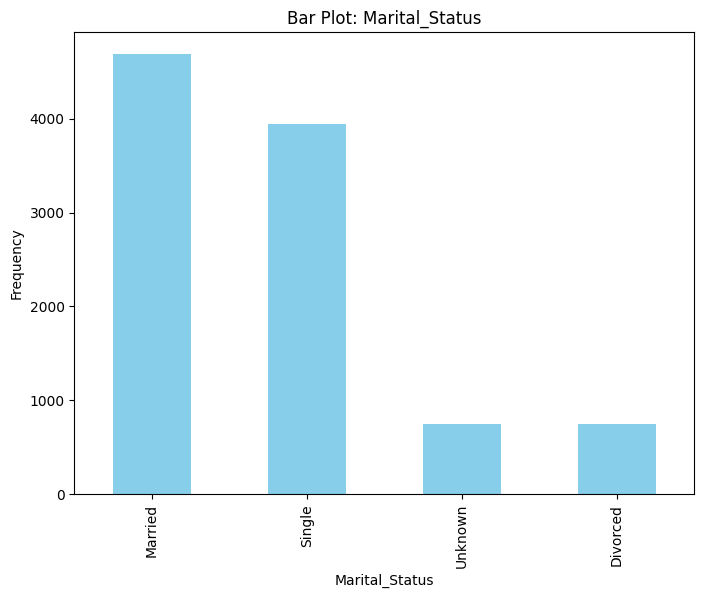

Percentage distribution for Income_Category
Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64



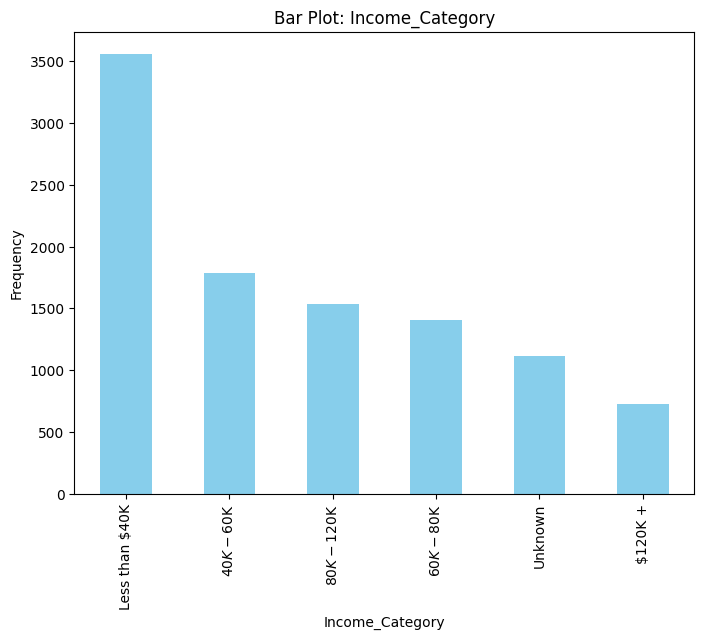

Percentage distribution for Card_Category
Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64



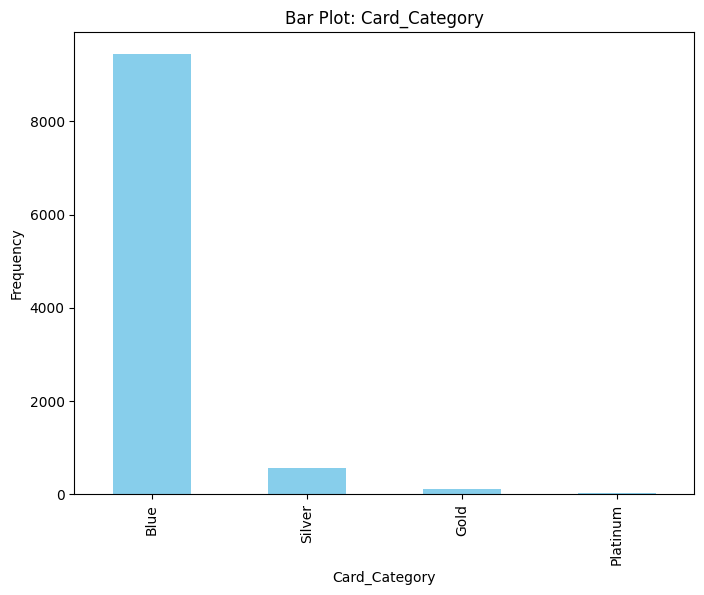

In [14]:
for col in categorical_cols:
    univariate_categorical_analysis(df, col)

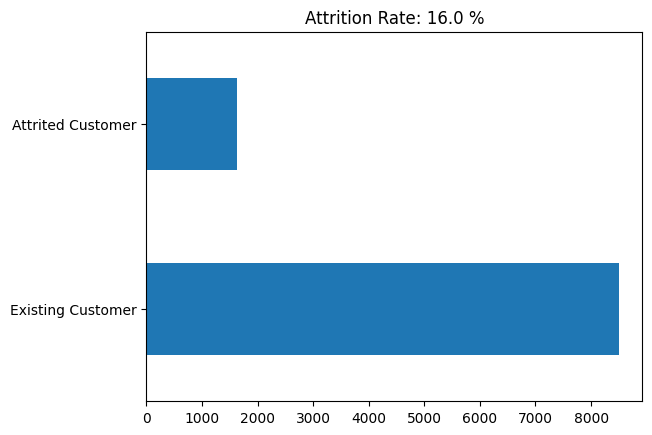

In [15]:
# Perform analysis on target
df.Attrition_Flag.value_counts().plot(kind='barh')
plt.title(f'Attrition Rate: {round(df.Attrition_Flag.value_counts(normalize=True)[1],2) * 100} %')
plt.show()

## Observations:

## Bivariate Analysis

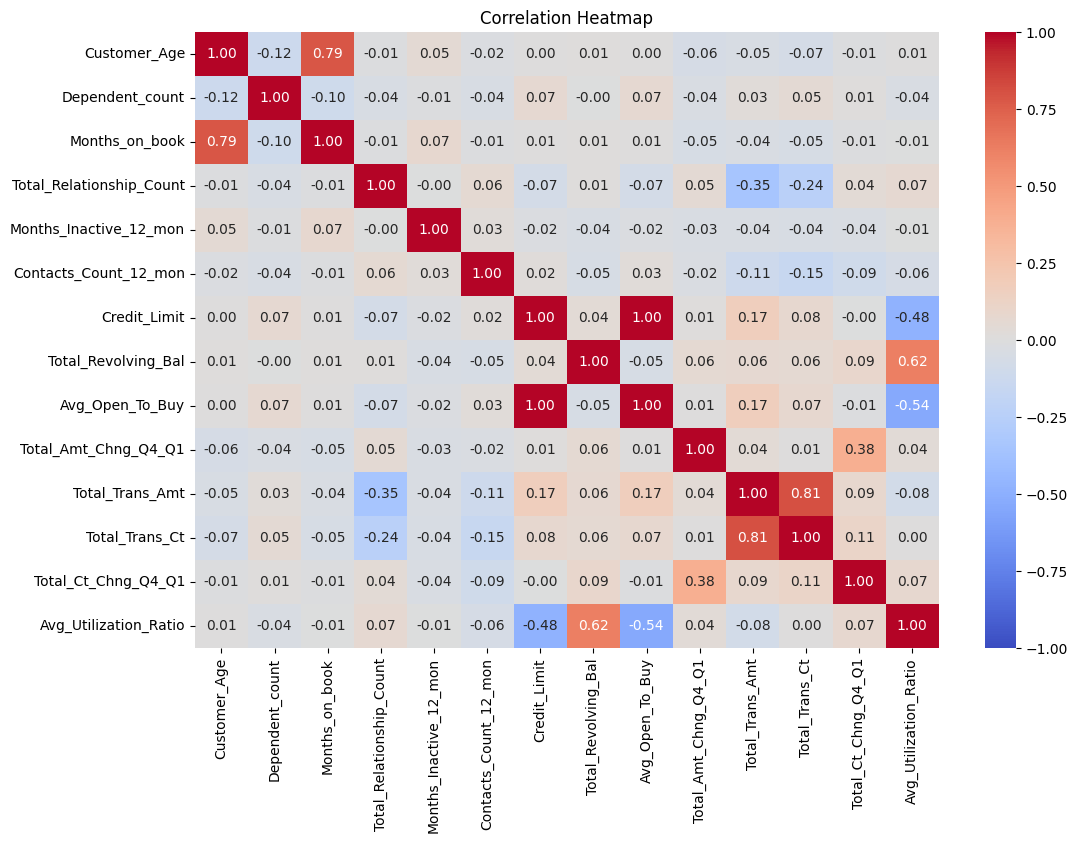

In [16]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

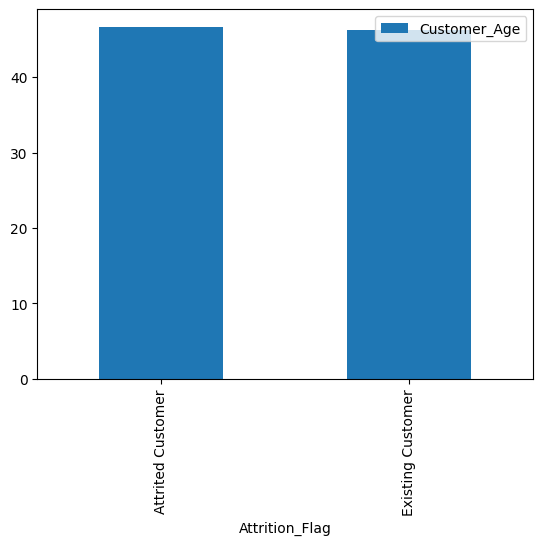

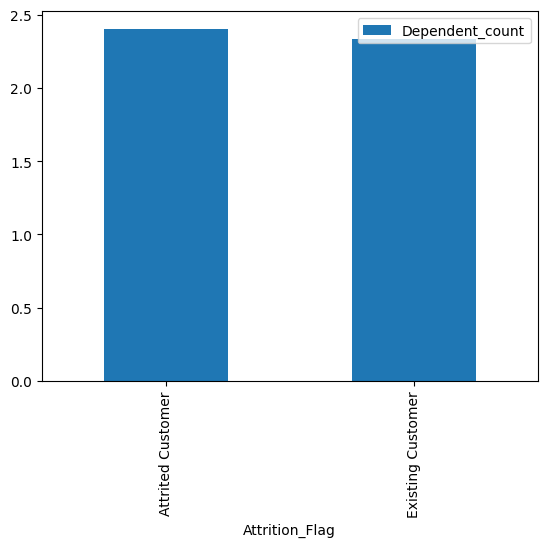

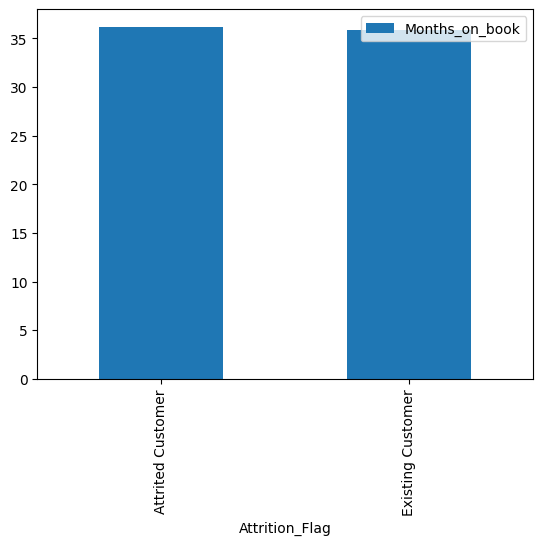

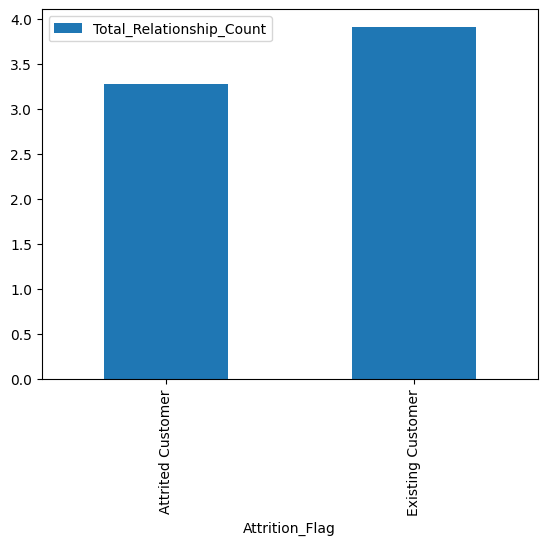

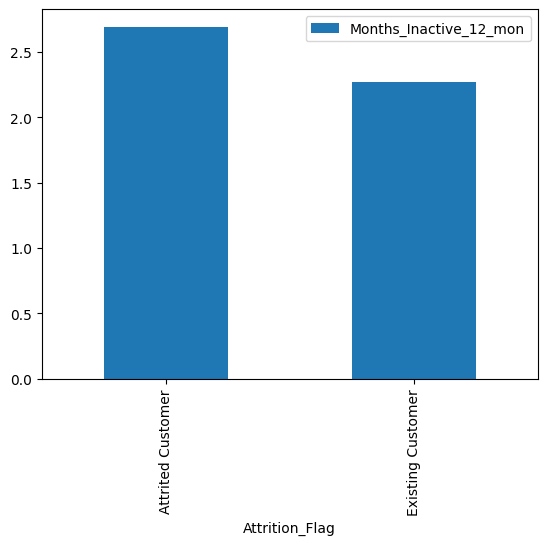

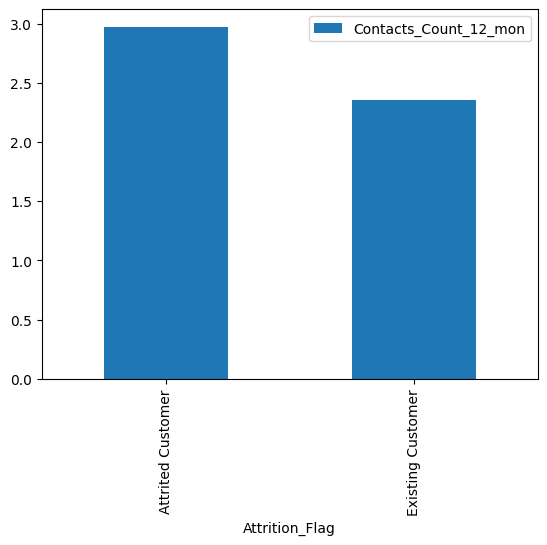

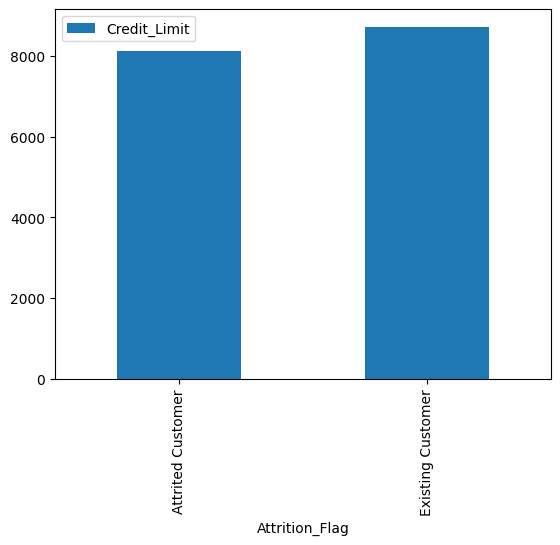

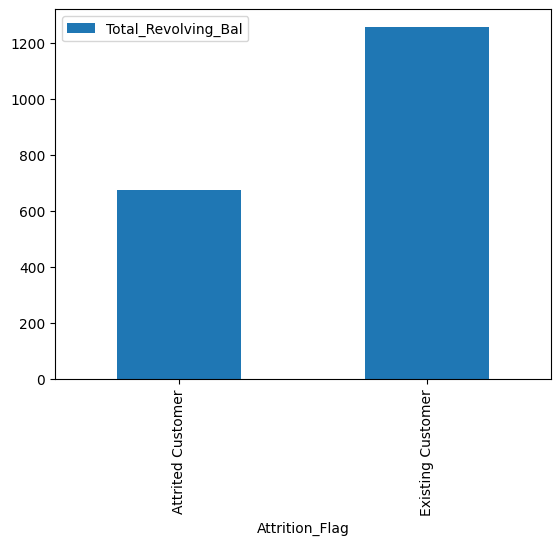

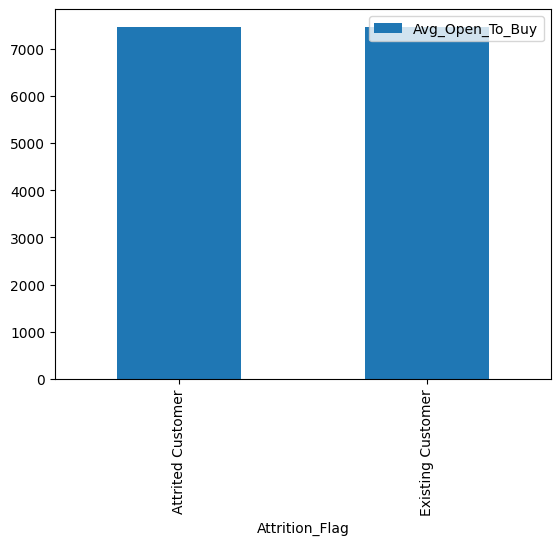

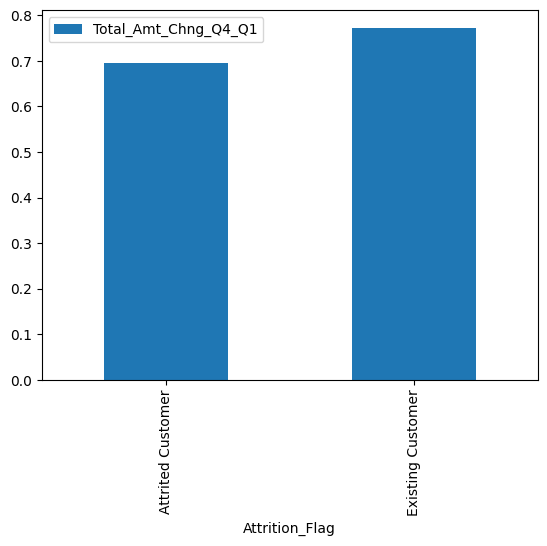

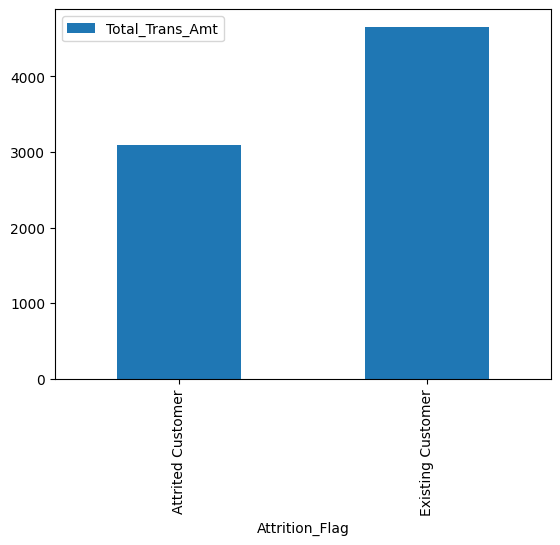

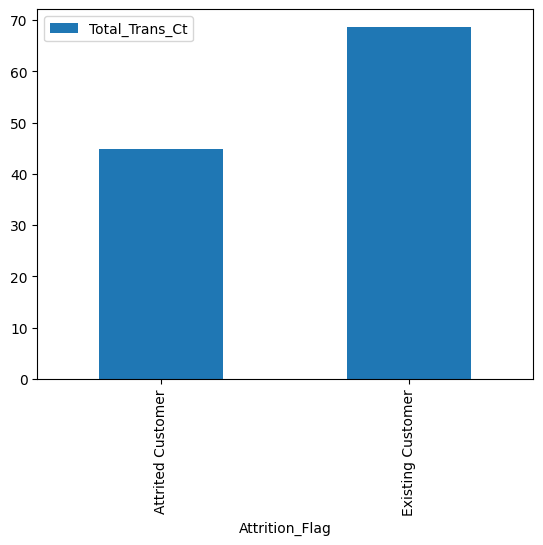

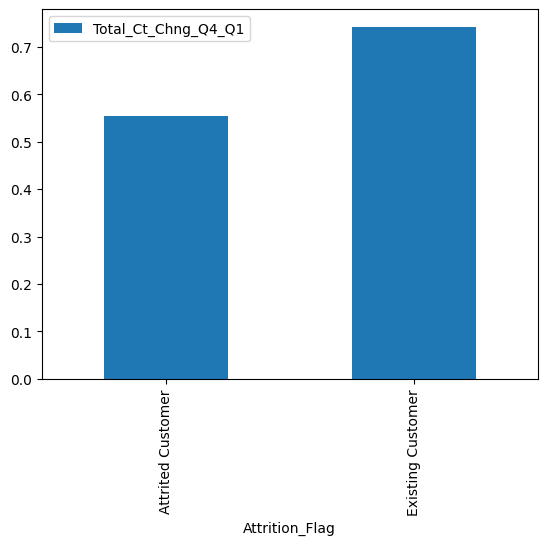

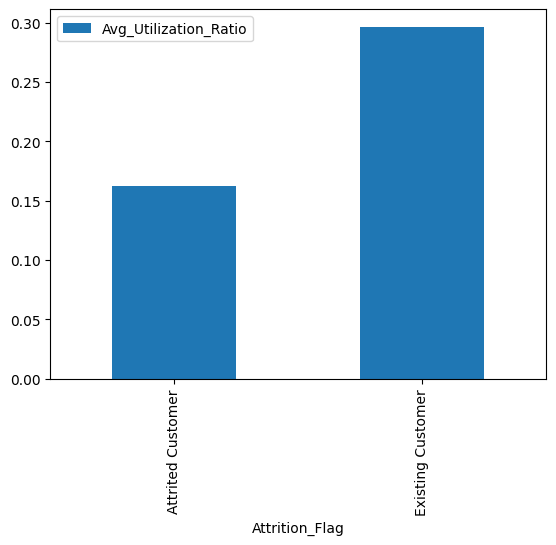

In [17]:
for col in numerical_cols:
    df.pivot_table(index = 'Attrition_Flag', values = col, aggfunc='mean').plot(kind = 'bar')

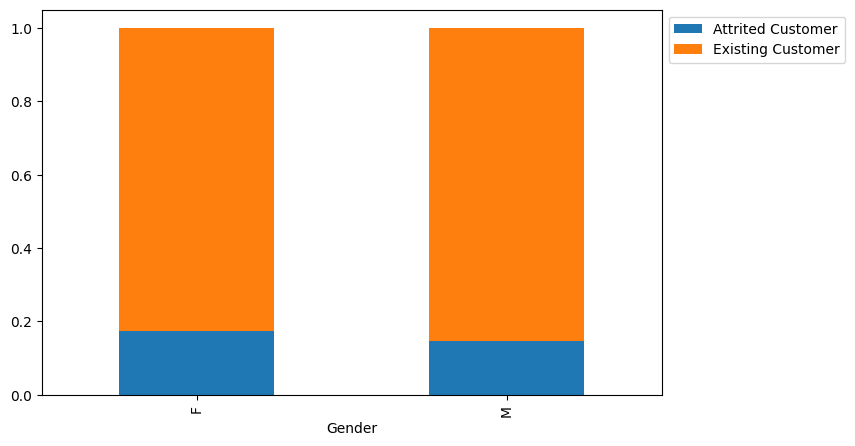

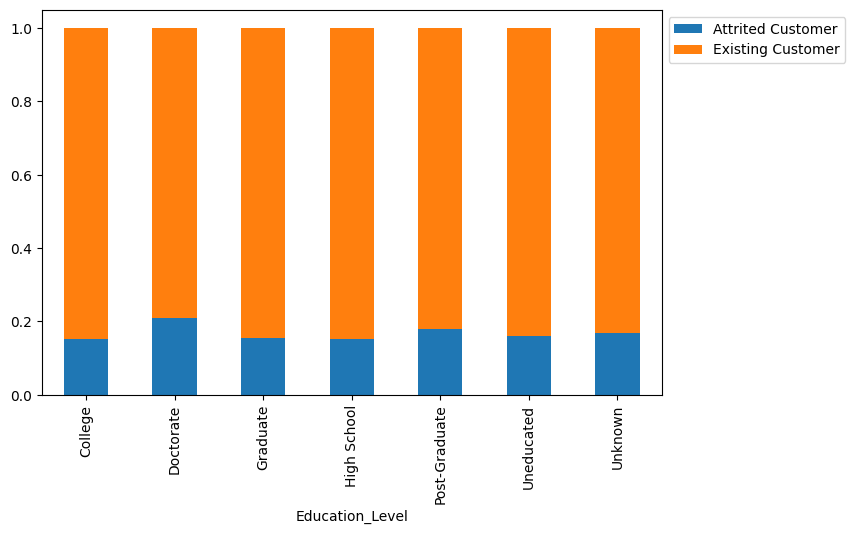

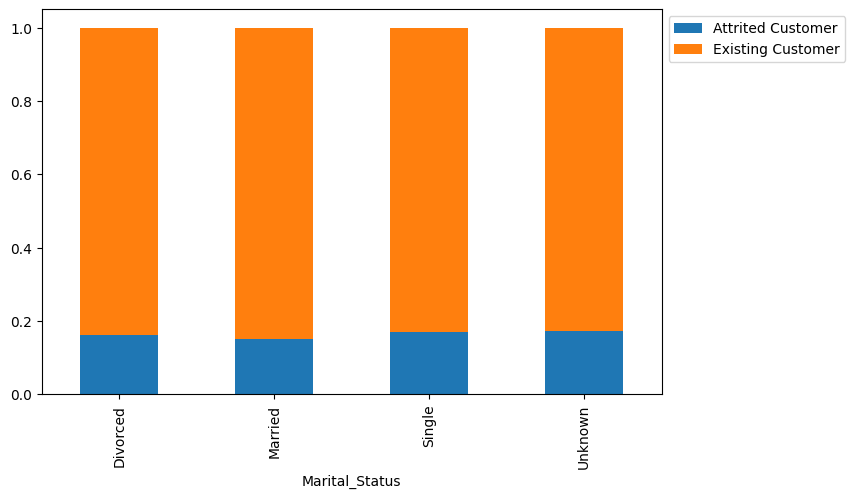

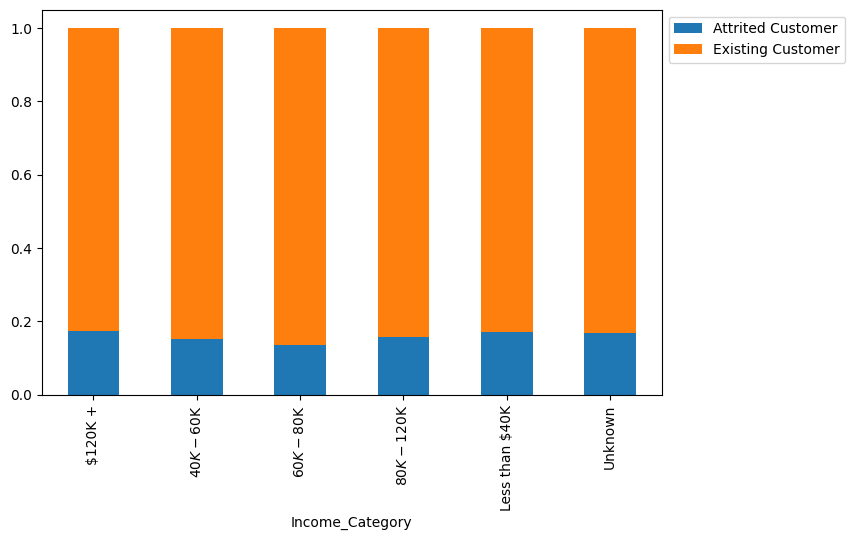

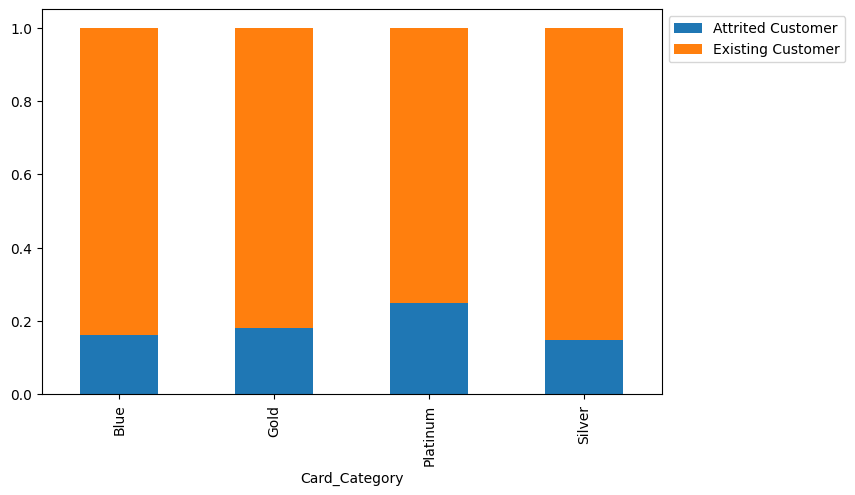

In [18]:
# Define a 100% stacked bar chart
for col in categorical_cols:
    summ = pd.crosstab(df[col], df['Attrition_Flag'], normalize='index')
    summ.plot(kind="bar", stacked=True, figsize=(8, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Observations:

## Feature Reduction/Engineering Step

In [19]:
# Columns to drop - Drop the varibales that doesn't seem to provide much of an impact on our target variable

df.drop(columns=['CLIENTNUM' , 'Avg_Open_To_Buy', 'Months_on_book' , 'Marital_Status'], inplace=True)

In [20]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [21]:
# Convert education level to be a little less granular with higher education [post grad onwards] having more impact and lower education

df.Education_Level = df.Education_Level.apply(lambda x: 'Higher ed' if x in ['Post-Graduate', 'Doctorate'] else 'Lower ed')

In [22]:
## We will encode the target variable to 1 and 0 where 1 represents the people who have churned.
df.Attrition_Flag = df.Attrition_Flag.apply(lambda x: 0 if x == "Existing Customer" else 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,Lower ed,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,F,5,Lower ed,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,M,3,Lower ed,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,F,4,Lower ed,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,M,3,Lower ed,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


## Data Preprocessing

In [23]:
# Remove the columns already dropped from the data
categorical_cols.remove('Marital_Status')

# apply the one hot label encoding
df=pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

## Additional exercise: Segregate which columns can be label encode and perform label encoding of them instead of one hot encoding

,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Gender_M,Education_Level_Lower ed,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,5,1,3,12691.0,777,1.335,1144,...,1,1,0,1,0,0,0,0,0,0
1,0,49,5,6,1,2,8256.0,864,1.541,1291,...,0,1,0,0,0,1,0,0,0,0
2,0,51,3,4,1,0,3418.0,0,2.594,1887,...,1,1,0,0,1,0,0,0,0,0
3,0,40,4,3,4,1,3313.0,2517,1.405,1171,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,5,1,0,4716.0,0,2.175,816,...,1,1,0,1,0,0,0,0,0,0


#### Additional Exercise: Treat the outliers using IQR Rule specially on rfm attributes

## Train Test Split

In [24]:
# specifying the independent and dependent set of variables
X = df.drop(["Attrition_Flag"], axis=1)
Y = df["Attrition_Flag"]

# splitting data in train and test sets
# A good rule of thumb is 70% data in train set and 30% data in test set
# Explaint the stratification here
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, stratify=Y, random_state=1
)

In [25]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (7088, 22)
Shape of test set : (3039, 22)
Percentage of classes in training set:
0    0.839306
1    0.160694
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0    0.839421
1    0.160579
Name: Attrition_Flag, dtype: float64


## Model Fitting and evaluation

Choose the appropriate criteria (metric) before you move on with model fitting.
    
    a. Accuracy
    b. Precision
    c. Recall
    d. F1 Score

Ans. Recall: Bank would be interested in loss of opportunity cases and wouldn't want the customers to leave. Therefore, we will be more interested in recall score.

In [26]:
# Fit random forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model.score(X_train, y_train) # Calculate the accuracy on train set

1.0

In [27]:
rf_model.score(X_test, y_test)

0.9568937150378414

In [28]:
print(classification_report(y_train, rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      1.00      1.00      1139

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088



In [29]:
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.92      0.80      0.86       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [30]:
# Fit Gradient boosting

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

gb_model.score(X_train, y_train) # Calculate the accuracy on train set

0.9747460496613995

In [31]:
gb_model.score(X_test, y_test)

0.9674234945705824

In [32]:
print(classification_report(y_train, gb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5949
           1       0.96      0.88      0.92      1139

    accuracy                           0.97      7088
   macro avg       0.97      0.94      0.95      7088
weighted avg       0.97      0.97      0.97      7088



In [33]:
print(classification_report(y_test, gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2551
           1       0.93      0.86      0.90       488

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



#### Since we have very low amount of data (and even lower amount of interesting cases), we will restrict our search of model with over sampling.

#### Over sampling with random forest and gradient boosting

In [34]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Print out the frequency of target before and after over sampling
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1139
Before Oversampling, counts of label 'No': 5949 

After Oversampling, counts of label 'Yes': 5949
After Oversampling, counts of label 'No': 5949 

After Oversampling, the shape of train_X: (11898, 22)
After Oversampling, the shape of train_y: (11898,) 



In [35]:
rf_model_over = RandomForestClassifier()
rf_model_over.fit(X_train_over, y_train_over)

rf_model_over.score(X_train_over, y_train_over) # Calculate the accuracy on train set

1.0

In [36]:
print(classification_report(y_train_over, rf_model_over.predict(X_train_over)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      1.00      1.00      5949

    accuracy                           1.00     11898
   macro avg       1.00      1.00      1.00     11898
weighted avg       1.00      1.00      1.00     11898



In [37]:
print(classification_report(y_test, rf_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2551
           1       0.86      0.87      0.86       488

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [38]:
gb_model_over = GradientBoostingClassifier()
gb_model_over.fit(X_train_over, y_train_over)

gb_model_over.score(X_train_over, y_train_over) # Calculate the accuracy on train set

0.9747856782652546

In [39]:
print(classification_report(y_train_over, gb_model_over.predict(X_train_over)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5949
           1       0.97      0.98      0.97      5949

    accuracy                           0.97     11898
   macro avg       0.97      0.97      0.97     11898
weighted avg       0.97      0.97      0.97     11898



In [40]:
print(classification_report(y_test, gb_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2551
           1       0.82      0.93      0.87       488

    accuracy                           0.95      3039
   macro avg       0.90      0.94      0.92      3039
weighted avg       0.96      0.95      0.96      3039



## Hyperparameter Tuning using Randomized Search

### Random Forest Parameters:

**n_estimators**: The number of trees in the forest (default: 100)

**max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples (default: None). 

**max_features{“sqrt”, “log2”, int, None}**: The number of features to consider when looking for the best split (default: sqrt).

In [41]:
from sklearn import metrics
# Choose the type of classifier. 
rf_tuned0 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(rf_tuned0, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned0 = random_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned0.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..max_depth=10, max_features=None, n_estimators=110; total time=   3.6s
[CV] END ..max_depth=10, max_features=None, n_estimators=110; total time=   3.4s
[CV] END ..max_depth=10, max_features=None, n_estimators=110; total time=   3.1s
[CV] END ...max_depth=8, max_features=None, n_estimators=120; total time=   3.1s
[CV] END ...max_depth=8, max_features=None, n_estimators=120; total time=   3.9s
[CV] END ...max_depth=8, max_features=None, n_estimators=120; total time=   3.8s
[CV] END max_depth=None, max_features=sqrt, n_estimators=120; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=120; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=120; total time=   1.2s
[CV] END ...max_depth=8, max_features=log2, n_estimators=110; total time=   0.8s
[CV] END ...max_depth=8, max_features=log2, n_estimators=110; total time=   0.7s
[CV] END ...max_depth=8, max_features=log2, n_e

[CV] END ...max_depth=6, max_features=sqrt, n_estimators=120; total time=   0.9s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=110; total time=   0.8s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=110; total time=   0.8s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=110; total time=   0.8s
[CV] END ....max_depth=8, max_features=log2, n_estimators=90; total time=   0.6s
[CV] END ....max_depth=8, max_features=log2, n_estimators=90; total time=   0.6s
[CV] END ....max_depth=8, max_features=log2, n_estimators=90; total time=   0.6s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=80; total time=   0.6s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=80; total time=   0.6s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=80; total time=   0.5s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=80; total time=   0.5s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=80; total time=   0.4s
[CV] END ....max_depth=6, ma

RandomForestClassifier(max_depth=10, max_features=None, n_estimators=110,
                       random_state=1)

In [42]:
print(classification_report(y_train, rf_tuned0.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5949
           1       0.99      0.97      0.98      1139

    accuracy                           0.99      7088
   macro avg       0.99      0.98      0.99      7088
weighted avg       0.99      0.99      0.99      7088



In [43]:
print(classification_report(y_test, rf_tuned0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2551
           1       0.89      0.87      0.88       488

    accuracy                           0.96      3039
   macro avg       0.93      0.92      0.93      3039
weighted avg       0.96      0.96      0.96      3039



### Gradient Boosting Parameters:

**n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf) (default: 100).

**max_depth**: Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. If int, values must be in the range [1, inf) (default: 3).

**max_features{“sqrt”, “log2”, int, None}**: The number of features to consider when looking for the best split (default: None).

**learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf) (default: 0.1).

**subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0] (default: 1).


In [44]:
# Choose the type of classifier. 
gb_tuned0 = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'learning_rate': np.arange(0.001, 0.1, 0.001),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(gb_tuned0, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned0 = random_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned0.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.089, max_depth=10, max_features=1, n_estimators=175, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.089, max_depth=10, max_features=1, n_estimators=175, subsample=0.9; total time=   3.8s
[CV] END learning_rate=0.089, max_depth=10, max_features=1, n_estimators=175, subsample=0.9; total time=   3.5s
[CV] END learning_rate=0.005, max_depth=5, max_features=0.9, n_estimators=150, subsample=1; total time=   3.2s
[CV] END learning_rate=0.005, max_depth=5, max_features=0.9, n_estimators=150, subsample=1; total time=   3.6s
[CV] END learning_rate=0.005, max_depth=5, max_features=0.9, n_estimators=150, subsample=1; total time=   3.7s
[CV] END learning_rate=0.078, max_depth=3, max_features=0.9, n_estimators=50, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.078, max_depth=3, max_features=0.9, n_estimators=50, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.078, max_depth=3, ma

[CV] END learning_rate=0.05, max_depth=10, max_features=0.8, n_estimators=100, subsample=1; total time=   6.1s
[CV] END learning_rate=0.05, max_depth=10, max_features=0.8, n_estimators=100, subsample=1; total time=   5.4s
[CV] END learning_rate=0.05, max_depth=10, max_features=0.8, n_estimators=100, subsample=1; total time=   5.3s
[CV] END learning_rate=0.04, max_depth=3, max_features=1, n_estimators=150, subsample=1; total time=   0.4s
[CV] END learning_rate=0.04, max_depth=3, max_features=1, n_estimators=150, subsample=1; total time=   0.4s
[CV] END learning_rate=0.04, max_depth=3, max_features=1, n_estimators=150, subsample=1; total time=   0.4s
[CV] END learning_rate=0.09, max_depth=3, max_features=0.7, n_estimators=150, subsample=1; total time=   2.0s
[CV] END learning_rate=0.09, max_depth=3, max_features=0.7, n_estimators=150, subsample=1; total time=   2.0s
[CV] END learning_rate=0.09, max_depth=3, max_features=0.7, n_estimators=150, subsample=1; total time=   1.7s
[CV] END lear

[CV] END learning_rate=0.063, max_depth=10, max_features=1, n_estimators=150, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.063, max_depth=10, max_features=1, n_estimators=150, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.063, max_depth=10, max_features=1, n_estimators=150, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.023, max_depth=3, max_features=1, n_estimators=175, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.023, max_depth=3, max_features=1, n_estimators=175, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.023, max_depth=3, max_features=1, n_estimators=175, subsample=0.8; total time=   0.5s


GradientBoostingClassifier(learning_rate=0.095, max_features=0.7,
                           n_estimators=175, random_state=1, subsample=0.8)

In [45]:
print(classification_report(y_train, gb_tuned0.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5949
           1       0.96      0.92      0.94      1139

    accuracy                           0.98      7088
   macro avg       0.97      0.96      0.97      7088
weighted avg       0.98      0.98      0.98      7088



In [46]:
print(classification_report(y_test, gb_tuned0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2551
           1       0.94      0.91      0.92       488

    accuracy                           0.97      3039
   macro avg       0.96      0.95      0.95      3039
weighted avg       0.97      0.97      0.97      3039



In [47]:
from sklearn import metrics

# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = random_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=120; total time=   1.3s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=120; total time=   1.2s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=120; total time=   1.2s
[CV] END ...max_depth=8, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=8, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=8, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END .max_depth=None, max_features=None, n_estimators=90; total time=   5.5s
[CV] END .max_depth=None, max_features=None, n_estimators=90; total time=   5.4s
[CV] END .max_depth=None, max_features=None, n_estimators=90; total time=   5.4s
[CV] END ...max_depth=8, max_features=None, n_estimators=110; total time=   5.9s
[CV] END ...max_depth=8, max_features=None, n_estimators=110; total time=   5.3s
[CV] END ...max_depth=8, max_features=None, n_e

[CV] END ....max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.6s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=110; total time=   1.4s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=110; total time=   1.4s
[CV] END ...max_depth=8, max_features=sqrt, n_estimators=110; total time=   1.4s
[CV] END ...max_depth=6, max_features=log2, n_estimators=120; total time=   1.1s
[CV] END ...max_depth=6, max_features=log2, n_estimators=120; total time=   1.1s
[CV] END ...max_depth=6, max_features=log2, n_estimators=120; total time=   1.0s
[CV] END max_depth=None, max_features=None, n_estimators=120; total time=   7.3s
[CV] END max_depth=None, max_features=None, n_estimators=120; total time=   7.6s
[CV] END max_depth=None, max_features=None, n_estimators=120; total time=   6.7s
[CV] END ....max_depth=6, max_features=log2, n_estimators=90; total time=   0.7s
[CV] END ....max_depth=6, max_features=log2, n_estimators=90; total time=   0.8s
[CV] END ....max_depth=6, ma

RandomForestClassifier(n_estimators=90, random_state=1)

In [48]:
print(classification_report(y_train_over, rf_tuned.predict(X_train_over)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5949
           1       1.00      0.91      0.96      5949

    accuracy                           0.96     11898
   macro avg       0.96      0.96      0.96     11898
weighted avg       0.96      0.96      0.96     11898



In [49]:
print(classification_report(y_test, rf_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2551
           1       0.93      0.80      0.86       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [50]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'learning_rate': np.arange(0.001, 0.1, 0.001),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gb_tuned = random_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.094, max_depth=10, max_features=0.8, n_estimators=175, subsample=0.8; total time=  13.5s
[CV] END learning_rate=0.094, max_depth=10, max_features=0.8, n_estimators=175, subsample=0.8; total time=  13.6s
[CV] END learning_rate=0.094, max_depth=10, max_features=0.8, n_estimators=175, subsample=0.8; total time=  13.3s
[CV] END learning_rate=0.07, max_depth=5, max_features=1, n_estimators=150, subsample=1; total time=   0.8s
[CV] END learning_rate=0.07, max_depth=5, max_features=1, n_estimators=150, subsample=1; total time=   0.8s
[CV] END learning_rate=0.07, max_depth=5, max_features=1, n_estimators=150, subsample=1; total time=   0.8s
[CV] END learning_rate=0.023, max_depth=3, max_features=0.8, n_estimators=125, subsample=0.9; total time=   2.5s
[CV] END learning_rate=0.023, max_depth=3, max_features=0.8, n_estimators=125, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.023, max_depth=3, max

[CV] END learning_rate=0.053000000000000005, max_depth=10, max_features=0.8, n_estimators=100, subsample=1; total time=   8.4s
[CV] END learning_rate=0.053000000000000005, max_depth=10, max_features=0.8, n_estimators=100, subsample=1; total time=   9.0s
[CV] END learning_rate=0.053000000000000005, max_depth=10, max_features=0.8, n_estimators=100, subsample=1; total time=   9.0s
[CV] END learning_rate=0.097, max_depth=10, max_features=0.9, n_estimators=75, subsample=0.8; total time=   5.9s
[CV] END learning_rate=0.097, max_depth=10, max_features=0.9, n_estimators=75, subsample=0.8; total time=   5.5s
[CV] END learning_rate=0.097, max_depth=10, max_features=0.9, n_estimators=75, subsample=0.8; total time=   6.3s
[CV] END learning_rate=0.077, max_depth=3, max_features=0.8, n_estimators=75, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.077, max_depth=3, max_features=0.8, n_estimators=75, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.077, max_depth=3, max_features=

[CV] END learning_rate=0.028, max_depth=5, max_features=0.7, n_estimators=125, subsample=1; total time=   3.7s
[CV] END learning_rate=0.028, max_depth=5, max_features=0.7, n_estimators=125, subsample=1; total time=   3.6s
[CV] END learning_rate=0.028, max_depth=5, max_features=0.7, n_estimators=125, subsample=1; total time=   4.0s
[CV] END learning_rate=0.077, max_depth=5, max_features=0.9, n_estimators=175, subsample=0.7; total time=   5.3s
[CV] END learning_rate=0.077, max_depth=5, max_features=0.9, n_estimators=175, subsample=0.7; total time=   4.8s
[CV] END learning_rate=0.077, max_depth=5, max_features=0.9, n_estimators=175, subsample=0.7; total time=   5.0s


GradientBoostingClassifier(learning_rate=0.094, max_depth=10, max_features=0.8,
                           n_estimators=175, random_state=1, subsample=0.8)

In [51]:
print(classification_report(y_train_over, gb_tuned.predict(X_train_over)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5949
           1       1.00      0.96      0.98      5949

    accuracy                           0.98     11898
   macro avg       0.98      0.98      0.98     11898
weighted avg       0.98      0.98      0.98     11898



In [52]:
print(classification_report(y_test, gb_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2551
           1       0.93      0.90      0.91       488

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.95      3039
weighted avg       0.97      0.97      0.97      3039



In [53]:
models_train_comp_df = pd.DataFrame(
    [
        [precision_score(y_train, rf_model.predict(X_train)), 
         recall_score(y_train, rf_model.predict(X_train)),
        f1_score(y_train, rf_model.predict(X_train))],
        
        [precision_score(y_train, gb_model.predict(X_train)), 
         recall_score(y_train, gb_model.predict(X_train)),
        f1_score(y_train, gb_model.predict(X_train))],
        
         [precision_score(y_train_over, rf_model_over.predict(X_train_over)), 
         recall_score(y_train_over, rf_model_over.predict(X_train_over)),
        f1_score(y_train_over, rf_model_over.predict(X_train_over))],
        
        [precision_score(y_train_over, gb_model_over.predict(X_train_over)), 
         recall_score(y_train_over, gb_model_over.predict(X_train_over)),
        f1_score(y_train_over, gb_model_over.predict(X_train_over))],
        
        [precision_score(y_train, rf_tuned0.predict(X_train)), 
         recall_score(y_train, rf_tuned0.predict(X_train)),
        f1_score(y_train, rf_tuned0.predict(X_train))],
        
        [precision_score(y_train, gb_tuned0.predict(X_train)), 
         recall_score(y_train, gb_tuned0.predict(X_train)),
        f1_score(y_train, gb_tuned0.predict(X_train))],
        
        [precision_score(y_train_over, rf_tuned.predict(X_train_over)), 
         recall_score(y_train_over, rf_tuned.predict(X_train_over)),
        f1_score(y_train_over, rf_tuned.predict(X_train_over))],
        
        [precision_score(y_train_over, gb_tuned.predict(X_train_over)), 
         recall_score(y_train_over, gb_tuned.predict(X_train_over)),
        f1_score(y_train_over, gb_tuned.predict(X_train_over))]
    ]
, columns=['Precision', 'recall', 'f1 score']).T
models_train_comp_df.columns = [
    "RF",
    "GB",
    "RF with oversampling",
    "GB with oversampling",
    "Tuned RF",
    "Tuned GB",
    "Tuned RF with oversampling",
    "Tuned GB with oversampling",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,RF,GB,RF with oversampling,GB with oversampling,Tuned RF,Tuned GB,Tuned RF with oversampling,Tuned GB with oversampling
Precision,1.0,0.958015,1.0,0.971300,0.990126,0.960766,1.000000,1.000000
recall,1.0,0.881475,1.0,0.978484,0.968393,0.924495,0.914944,0.959153
f1 score,1.0,0.918153,1.0,0.974879,0.979139,0.942282,0.955583,0.979151


In [54]:
models_test_comp_df = pd.DataFrame(
    [
        [precision_score(y_test, rf_model.predict(X_test)), 
         recall_score(y_test, rf_model.predict(X_test)),
        f1_score(y_test, rf_model.predict(X_test))],
        
        [precision_score(y_test, gb_model.predict(X_test)), 
         recall_score(y_test, gb_model.predict(X_test)),
        f1_score(y_test, gb_model.predict(X_test))],
        
         [precision_score(y_test, rf_model_over.predict(X_test)), 
         recall_score(y_test, rf_model_over.predict(X_test)),
        f1_score(y_test, rf_model_over.predict(X_test))],
        
        [precision_score(y_test, gb_model_over.predict(X_test)), 
         recall_score(y_test, gb_model_over.predict(X_test)),
        f1_score(y_test, gb_model_over.predict(X_test))],
        
        [precision_score(y_test, rf_tuned0.predict(X_test)), 
         recall_score(y_test, rf_tuned0.predict(X_test)),
        f1_score(y_test, rf_tuned0.predict(X_test))],
        
        [precision_score(y_test, gb_tuned0.predict(X_test)), 
         recall_score(y_test, gb_tuned0.predict(X_test)),
        f1_score(y_test, gb_tuned0.predict(X_test))],
        
        [precision_score(y_test, rf_tuned.predict(X_test)), 
         recall_score(y_test, rf_tuned.predict(X_test)),
        f1_score(y_test, rf_tuned.predict(X_test))],
        
        [precision_score(y_test, gb_tuned.predict(X_test)), 
         recall_score(y_test, gb_tuned.predict(X_test)),
        f1_score(y_test, gb_tuned.predict(X_test))]
    ]
, columns=['Precision', 'recall', 'f1 score']).T
models_test_comp_df.columns = [
    "RF",
    "GB",
    "RF with oversampling",
    "GB with oversampling",
    "Tuned RF",
    "Tuned GB",
    "Tuned RF with oversampling",
    "Tuned GB with oversampling"
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,RF,GB,RF with oversampling,GB with oversampling,Tuned RF,Tuned GB,Tuned RF with oversampling,Tuned GB with oversampling
Precision,0.921986,0.927473,0.856275,0.815081,0.885177,0.936441,0.926540,0.927966
recall,0.799180,0.864754,0.866803,0.930328,0.868852,0.905738,0.801230,0.897541
f1 score,0.856202,0.895016,0.861507,0.868900,0.876939,0.920833,0.859341,0.912500


## AUC ROC SCORE 

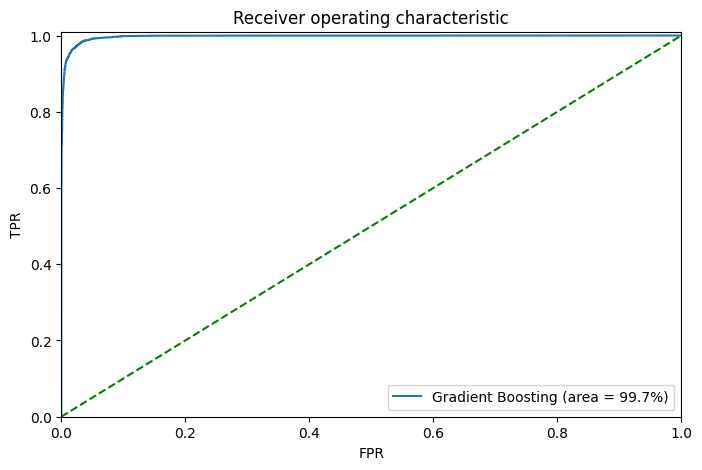

In [55]:
# Build a auc roc curve

roc_auc = roc_auc_score(y_train_over, gb_model_over.predict_proba(X_train_over)[:,1]) # Getting the best auc roc score
fpr, tpr, thresholds = roc_curve(y_train_over, gb_model_over.predict_proba(X_train_over)[:,1])
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"Gradient Boosting (area = {round(roc_auc,3) * 100}%)")
plt.plot([0, 1], [0, 1], "g--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Additional Exercise: Manipulate the threshold value

## Feature Importances

In [56]:
importances = gb_model_over.feature_importances_
indices = np.argsort(importances)

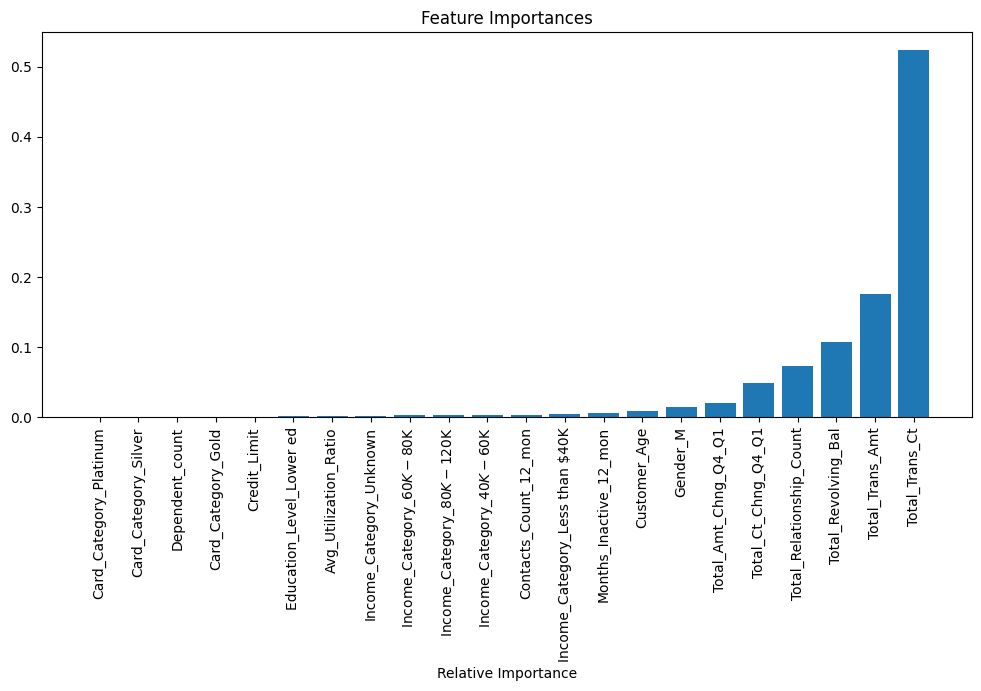

In [57]:
plt.figure(figsize=(12, 5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X_train_over.columns[i] for i in indices], rotation = 90)
plt.xlabel("Relative Importance")
plt.show()

#### Decile Analysis

1. Helps to understand the power of model. Higher the accuracy of the model, higher the changes of it segregating the interesting vs uninteresting cases in extreme deciles.
2. Effective decision making.
        1. Saving resources
        2. Target customers

In [58]:
# Lift and Gain chart

train_data = pd.DataFrame(np.stack([y_train_over, gb_model_over.predict_proba(X_train_over)[:, 1]], axis = 1))
test_data = pd.DataFrame(np.stack([y_test, gb_model_over.predict_proba(X_test)[:, 1]], axis = 1))

train_data.columns = ['y_actual', 'y_pred_proba']
test_data.columns = ['y_actual', 'y_pred_proba']

In [59]:
# We want to higher lables to lower value of predictions for final visualization
train_data['Deciles'] = pd.qcut( train_data.y_pred_proba, 10, labels = [10,9,8,7,6,5,4,3,2,1])
test_data['Deciles'] = pd.qcut( test_data.y_pred_proba, 10, labels = [10,9,8,7,6,5,4,3,2,1])

In [60]:
test_data.loc[test_data.Deciles.isin([1,2,3])] # Target these deciles in actual data

,y_actual,y_pred_proba,Deciles
1,1.0,0.989868,1
7,0.0,0.191260,3
23,1.0,0.217273,3
26,0.0,0.400598,3
28,0.0,0.599625,2
...,...,...,...
3018,0.0,0.323066,3
3020,0.0,0.206720,3
3023,0.0,0.147657,3
3025,0.0,0.168296,3


In [61]:
train_deciles = train_data.groupby('Deciles')[['y_pred_proba', 'y_actual']].agg( {'y_pred_proba' : ['min', 'max'], 
        'y_actual' : ['sum', 'count']} ).reset_index().sort_values(by = 'Deciles', ascending = False)
train_deciles

Deciles y_pred_proba           y_actual      
                   min       max      sum count
9       1     0.987999  0.997047   1189.0  1189
8       2     0.977843  0.987988   1191.0  1191
7       3     0.956188  0.977831   1189.0  1190
6       4     0.897604  0.956116   1180.0  1189
5       5     0.529500  0.897599   1047.0  1190
4       6     0.090175  0.529197    150.0  1190
3       7     0.030996  0.089900      3.0  1189
2       8     0.018258  0.030966      0.0  1190
1       9     0.012086  0.018242      0.0  1190
0      10     0.001393  0.012074      0.0  1190

In [62]:
test_deciles = test_data.groupby('Deciles')[['y_pred_proba', 'y_actual']].agg( {'y_pred_proba' : ['min', 'max'], 
        'y_actual' : ['sum', 'count']} ).reset_index().sort_values(by = 'Deciles', ascending = False)
test_deciles

Deciles y_pred_proba           y_actual      
                   min       max      sum count
9       1     0.897950  0.993487    297.0   304
8       2     0.411277  0.897839    166.0   304
7       3     0.144058  0.407226     20.0   304
6       4     0.060191  0.143284      5.0   304
5       5     0.034067  0.060079      0.0   303
4       6     0.023050  0.033990      0.0   304
3       7     0.017455  0.023014      0.0   304
2       8     0.013378  0.017446      0.0   304
1       9     0.010442  0.013364      0.0   304
0      10     0.002080  0.010439      0.0   304

In [64]:
train_deciles.columns = train_deciles.columns.droplevel()
train_deciles.columns = ['Deciles', 'Pred_min', 'Pred_max', 'Did Term deposit', 'Total']
train_deciles['No Term deposit'] = train_deciles.Total - train_deciles['Did Term deposit']
train_deciles = train_deciles[['Deciles', 'Pred_min', 'Pred_max', 'Did Term deposit', 'No Term deposit', 'Total']]

train_deciles['Did Term deposit %'] = train_deciles['Did Term deposit'] / train_deciles['Did Term deposit'].sum()
train_deciles['Cumulative Term deposit %'] = np.cumsum(train_deciles['Did Term deposit %'])
train_deciles['lift'] = train_deciles.apply(lambda x: (x['Cumulative Term deposit %']*100) / (x['Deciles'] * 10), axis=1)
train_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,No Term deposit,Total,Did Term deposit %,Cumulative Term deposit %,lift
9,1,0.987999,0.997047,1189.0,0.0,1189,0.199866,0.199866,1.998655
8,2,0.977843,0.987988,1191.0,0.0,1191,0.200202,0.400067,2.000336
7,3,0.956188,0.977831,1189.0,1.0,1190,0.199866,0.599933,1.999776
6,4,0.897604,0.956116,1180.0,9.0,1189,0.198353,0.798285,1.995714
5,5,0.529500,0.897599,1047.0,143.0,1190,0.175996,0.974281,1.948563
4,6,0.090175,0.529197,150.0,1040.0,1190,0.025214,0.999496,1.665826
3,7,0.030996,0.089900,3.0,1186.0,1189,0.000504,1.000000,1.428571
2,8,0.018258,0.030966,0.0,1190.0,1190,0.000000,1.000000,1.250000
1,9,0.012086,0.018242,0.0,1190.0,1190,0.000000,1.000000,1.111111
0,10,0.001393,0.012074,0.0,1190.0,1190,0.000000,1.000000,1.000000


In [65]:
test_deciles.columns = test_deciles.columns.droplevel()
test_deciles.columns = ['Deciles', 'Pred_min', 'Pred_max', 'Did Term deposit', 'Total']
test_deciles['No Term deposit'] = test_deciles.Total - test_deciles['Did Term deposit']
test_deciles = test_deciles[['Deciles', 'Pred_min', 'Pred_max', 'Did Term deposit', 'No Term deposit', 'Total']]

test_deciles['Did Term deposit %'] = test_deciles['Did Term deposit'] / test_deciles['Did Term deposit'].sum()
test_deciles['Cumulative Term deposit %'] = np.cumsum(test_deciles['Did Term deposit %'])
test_deciles['lift'] = test_deciles.apply(lambda x: (x['Cumulative Term deposit %']*100) / (x['Deciles'] * 10), axis=1)
test_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,No Term deposit,Total,Did Term deposit %,Cumulative Term deposit %,lift
9,1,0.897950,0.993487,297.0,7.0,304,0.608607,0.608607,6.086066
8,2,0.411277,0.897839,166.0,138.0,304,0.340164,0.948770,4.743852
7,3,0.144058,0.407226,20.0,284.0,304,0.040984,0.989754,3.299180
6,4,0.060191,0.143284,5.0,299.0,304,0.010246,1.000000,2.500000
5,5,0.034067,0.060079,0.0,303.0,303,0.000000,1.000000,2.000000
4,6,0.023050,0.033990,0.0,304.0,304,0.000000,1.000000,1.666667
3,7,0.017455,0.023014,0.0,304.0,304,0.000000,1.000000,1.428571
2,8,0.013378,0.017446,0.0,304.0,304,0.000000,1.000000,1.250000
1,9,0.010442,0.013364,0.0,304.0,304,0.000000,1.000000,1.111111
0,10,0.002080,0.010439,0.0,304.0,304,0.000000,1.000000,1.000000


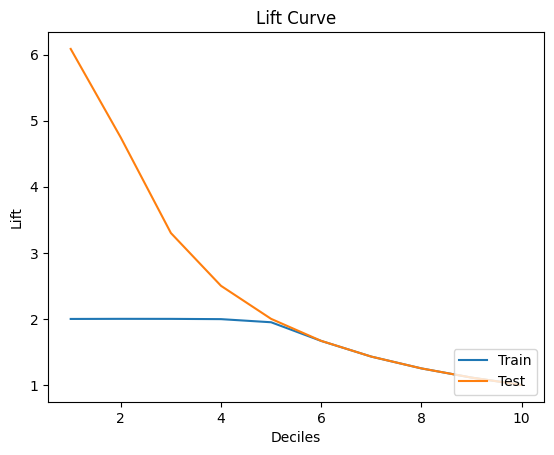

In [66]:
plt.plot(train_deciles.Deciles, train_deciles['lift'])
plt.plot(test_deciles.Deciles, test_deciles['lift'])

plt.legend(["Train", "Test"], loc ="lower right")
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.show()

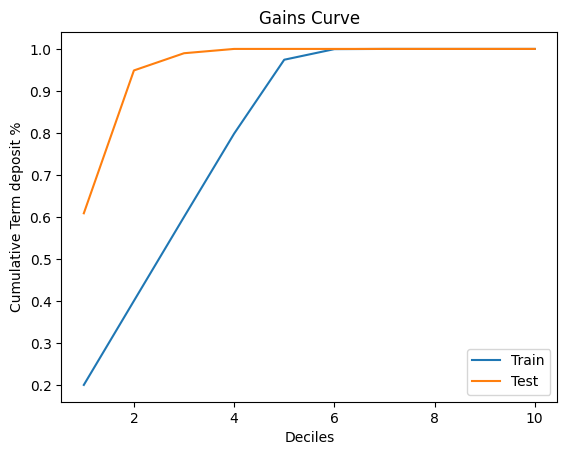

In [67]:
plt.plot(train_deciles.Deciles, train_deciles['Cumulative Term deposit %'])
plt.plot(test_deciles.Deciles, test_deciles['Cumulative Term deposit %'])

plt.legend(["Train", "Test"], loc ="lower right")
plt.xlabel('Deciles')
plt.ylabel('Cumulative Term deposit %')
plt.title('Gains Curve')
plt.show()